## Multivariate Regression

We are finally ready to start investigating explaining factors for customer satisfaction using our newly coded training data!

We will use a multivariate linear regression with [statsmodels](statsmodels.org) to measure order features importance on customer satisfaction.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
#import data
from olist.order import Order
data = Order().get_training_data()

### Prepare dataset

- Plot distribution plots for variable available in order training_set. What do you notice for variables `distance_seller_customer`, `price` and `freight_value` ?

- Scale the variables `distance_seller_customer`, `price` and `freight_value`

- Compute the correlation matrix for all features in `Order().get_training_data()`. Which features are correlated?

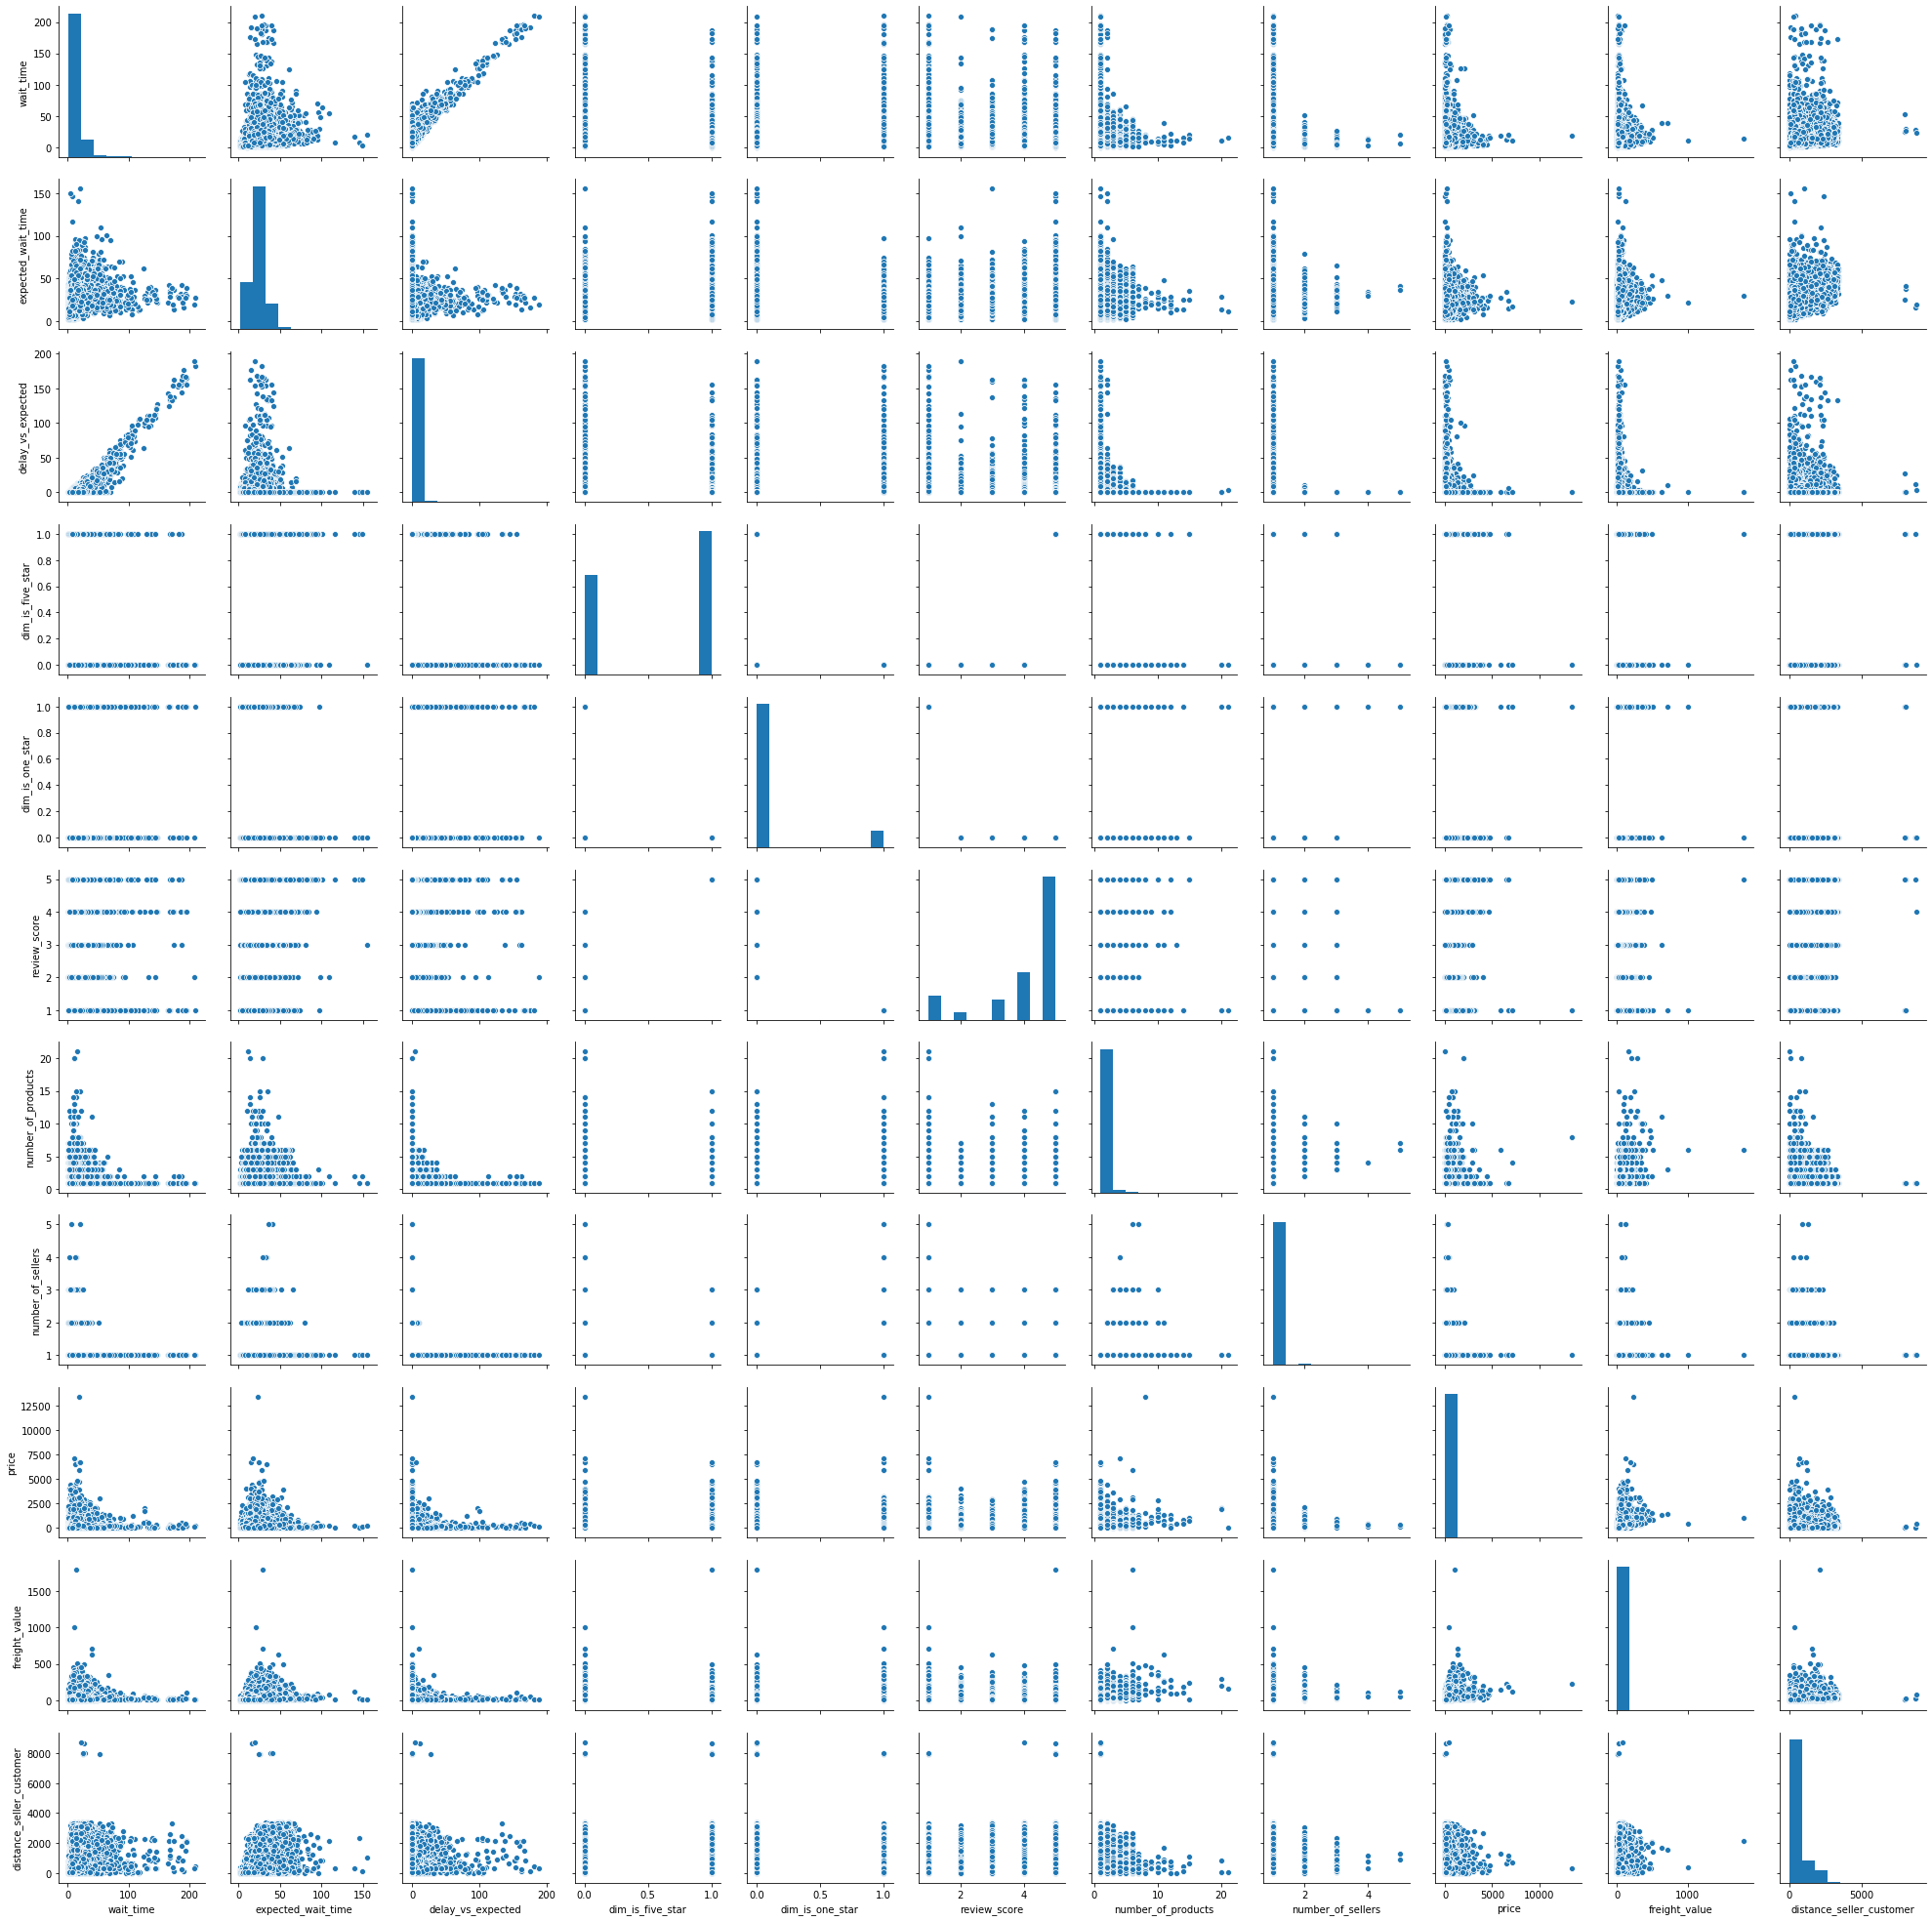

In [4]:
sns.pairplot(data)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[['distance_seller_customer', 'price', 'freight_value']])
StandardScaler()
print(scaler.mean_)
data[['distance_seller_customer', 'price', 'freight_value']] = \
    scaler.transform(data[['distance_seller_customer', 'price', 'freight_value']])

[601.05163425 136.93759217  22.77345063]


In [7]:
corr = data.corr()
corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
wait_time,1,0.383471,0.707351,-0.235361,0.306442,-0.335151,-0.0192302,-0.0407216,0.0559011,0.167077,0.39331
expected_wait_time,0.383471,1,0.0059917,-0.0501938,0.0350276,-0.052307,0.0163324,0.0248073,0.0762396,0.239143,0.513848
delay_vs_expected,0.707351,0.0059917,1,-0.157385,0.283187,-0.271984,-0.0132412,-0.017178,0.0170753,0.0242884,0.0665031
dim_is_five_star,-0.235361,-0.0501938,-0.157385,1,-0.400373,0.792044,-0.0731638,-0.0705839,-0.0138173,-0.0595124,-0.0565314
dim_is_one_star,0.306442,0.0350276,0.283187,-0.400373,1,-0.810365,0.120454,0.101659,0.0460109,0.0841842,0.0435296
review_score,-0.335151,-0.052307,-0.271984,0.792044,-0.810365,1,-0.124259,-0.116391,-0.0358174,-0.0910267,-0.0592304
number_of_products,-0.0192302,0.0163324,-0.0132412,-0.0731638,0.120454,-0.124259,1,0.286233,0.153998,0.439731,-0.0166735
number_of_sellers,-0.0407216,0.0248073,-0.017178,-0.0705839,0.101659,-0.116391,0.286233,1,0.0423848,0.133496,-0.00752388
price,0.0559011,0.0762396,0.0170753,-0.0138173,0.0460109,-0.0358174,0.153998,0.0423848,1,0.4116,0.0797265
freight_value,0.167077,0.239143,0.0242884,-0.0595124,0.0841842,-0.0910267,0.439731,0.133496,0.4116,1,0.313966


### Univariate Regression

- Run an OLS model `model1` where `review_score` is the target variable and `wait_time` is the dependent variable. Print the `summary` table: how do you interpret those results?
- statsmodel OLS API doc [here](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)
- patsy formula syntax [here](https://patsy.readthedocs.io/en/latest/formulas.html)

In [8]:
data.head(2)

,order_id,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,0,0,4,1,1,-0.511842,-0.651976,-0.979483
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,0,0,4,1,1,-0.087284,-0.000624,0.428833


In [9]:
model1 = smf.ols(formula='review_score ~ wait_time', data=data).fit()
model1.params

Intercept    4.713916
wait_time   -0.045557
dtype: float64

In [10]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.221e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:46:58   Log-Likelihood:            -1.5627e+05
No. Observations:               96510   AIC:                         3.126e+05
Df Residuals:                   96508   BIC:                         3.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7139      0.007    725.174      0.000       4.701       4.727
wait_time     -0.0456      0.000   -110.509      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19151.678   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34018.958
Skew:                          -1.282   Prob(JB):                         0.00
Kurtosis:                       4.374   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multivariate Regression

Run an OLS model `model2` where `review_score` is the target variable and `wait_time`, `distance_seller_customer`, `price` and `delay_vs_expected` are the dependent variables. Print the `summary` table: how do you interpret those results?

In [11]:
model2 = smf.ols(formula='review_score ~ wait_time + distance_seller_customer + price + delay_vs_expected', \
                 data=data).fit()
model2.params

Intercept                   4.726350
wait_time                  -0.045910
distance_seller_customer    0.101051
price                      -0.029181
delay_vs_expected          -0.010342
dtype: float64

In [12]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     3280.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:47:15   Log-Likelihood:            -1.5587e+05
No. Observations:               96510   AIC:                         3.118e+05
Df Residuals:                   96505   BIC:                         3.118e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.7263      0.009    547.613      0.000       4.709       4.743
wait_time                   -0.0459      0.001    -68.840      0.000      -0.047      -0.045
distance_seller_customer     0.1011      0.005     22.392      0.000       0.092       0.110
price                       -0.0292      0.004     -7.424      0.000      -0.037      -0.021
delay_vs_expected           -0.0103      0.001     -8.380      0.000      -0.013      -0.008
==============================================================================
Omnibus:                    19413.030   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37386.071
Skew:                          -1.235   Prob(JB):                         0.00
Kurtosis:                       4.788   Cond. No.                         36.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model check

- For model1 and model2, plot residuals graphs and QQplot.

Text(0, 0.5, 'Residual review_score')

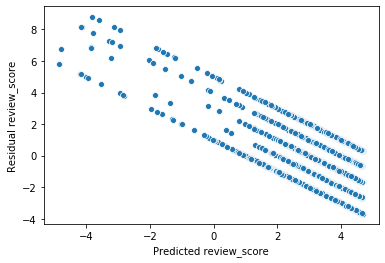

In [29]:
sns.scatterplot(model1.predict(data.wait_time), model1.resid)
plt.xlabel('Predicted review_score')
plt.ylabel('Residual review_score')

In [30]:
data.head(2)

,order_id,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,0,0,4,1,1,-0.511842,-0.651976,-0.979483
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,0,0,4,1,1,-0.087284,-0.000624,0.428833


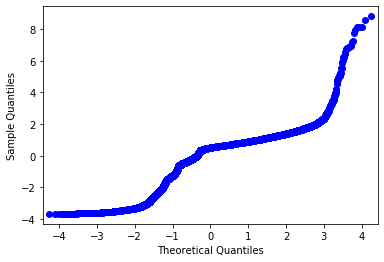

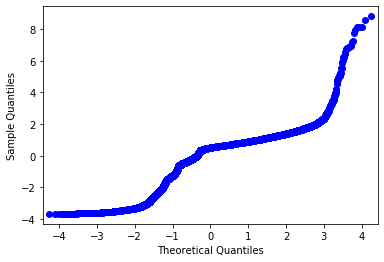

In [21]:
sm.qqplot(model1.resid)

Text(0, 0.5, 'Residual wait_time')

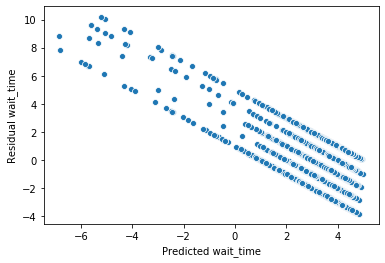

In [28]:
sns.scatterplot(model2.predict(data[['wait_time', 'distance_seller_customer', 'price', 'delay_vs_expected']]), model2.resid)
plt.xlabel('Predicted wait_time')
plt.ylabel('Residual wait_time')

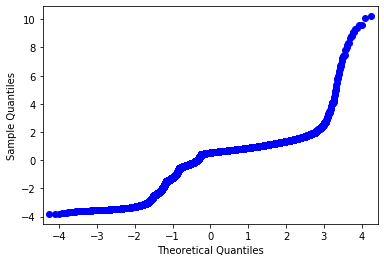

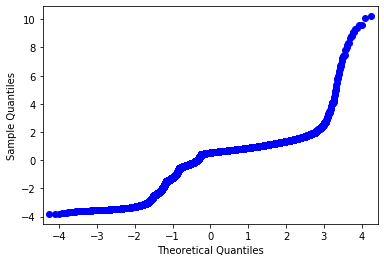

In [27]:
sm.qqplot(model2.resid)